In [1]:

import pandas as pd
df=pd.read_csv("E:\Assigment\energydata_complete.csv")
df.drop(['date'],axis=1,inplace=True)
df.rename(columns={'T1':'temp_kitchen','RH_1':'hum_kitchen','T2':'temp_living','RH_2':'hum_living','T3':'temp_laundry','RH_3':'hum_laundry','T4':'temp_office','RH_4':'hum_office','T5':'temp_bathroom','RH_5':'hum_bathroom','T6':'temp_northside','RH_6':'hum_northside','T7':'temp_ironing','RH_7':'hum_ironing','T8':'temp_teenager','RH_8':'hum_teenager','T9':'temp_parents','RH_9':'hum_parents','T_out':'temp_chievres','Press_mm_hg':'pressure_chievres','RH_out':'hum_chievres','Windspeed':'wind_chievres','Visibility':'visibility_chievres','Tdewpoint':'Tdewpoint_chievres','rv1':'random_variable1','rv2':'random_variable2'},inplace=True)
df.drop(['random_variable1','random_variable2'],axis=1,inplace=True)
print(df.head(5))

   Appliances  lights  temp_kitchen  hum_kitchen  temp_living  hum_living  \
0          60      30         19.89    47.596667         19.2   44.790000   
1          60      30         19.89    46.693333         19.2   44.722500   
2          50      30         19.89    46.300000         19.2   44.626667   
3          50      40         19.89    46.066667         19.2   44.590000   
4          60      40         19.89    46.333333         19.2   44.530000   

   temp_laundry  hum_laundry  temp_office  hum_office  ...  temp_teenager  \
0         19.79    44.730000    19.000000   45.566667  ...           18.2   
1         19.79    44.790000    19.000000   45.992500  ...           18.2   
2         19.79    44.933333    18.926667   45.890000  ...           18.2   
3         19.79    45.000000    18.890000   45.723333  ...           18.1   
4         19.79    45.000000    18.890000   45.530000  ...           18.1   

   hum_teenager  temp_parents  hum_parents  temp_chievres  pressure_chievr

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb
corrmat = df.corr()  
f, ax = plt.subplots(figsize =(14, 8)) 
sb.heatmap(corrmat, ax = ax, cmap ="YlGnBu",annot=True, linewidths = 0.5) 
df.drop(['temp_northside','temp_parents','lights','visibility_chievres'],axis=1,inplace=True)
print(df.head(5))

   Appliances  temp_kitchen  hum_kitchen  temp_living  hum_living  \
0          60         19.89    47.596667         19.2   44.790000   
1          60         19.89    46.693333         19.2   44.722500   
2          50         19.89    46.300000         19.2   44.626667   
3          50         19.89    46.066667         19.2   44.590000   
4          60         19.89    46.333333         19.2   44.530000   

   temp_laundry  hum_laundry  temp_office  hum_office  temp_bathroom  ...  \
0         19.79    44.730000    19.000000   45.566667      17.166667  ...   
1         19.79    44.790000    19.000000   45.992500      17.166667  ...   
2         19.79    44.933333    18.926667   45.890000      17.166667  ...   
3         19.79    45.000000    18.890000   45.723333      17.166667  ...   
4         19.79    45.000000    18.890000   45.530000      17.200000  ...   

   temp_ironing  hum_ironing  temp_teenager  hum_teenager  hum_parents  \
0     17.200000    41.626667           18.2     

In [3]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()


# Create dummy test and training set to hold scaled values

sc_df = pd.DataFrame(columns=df.columns , index=df.index)

sc_df[sc_df.columns] = sc.fit_transform(df)

sc_df.head()

E:\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
E:\Anaconda\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,Appliances,temp_kitchen,hum_kitchen,temp_living,hum_living,temp_laundry,hum_laundry,temp_office,hum_office,temp_bathroom,...,temp_ironing,hum_ironing,temp_teenager,hum_teenager,hum_parents,temp_chievres,pressure_chievres,hum_chievres,wind_chievres,Tdewpoint_chievres
0,-0.367676,-1.118645,1.843821,-0.520411,1.073683,-1.235063,1.686130,-0.908217,1.506438,-1.314903,...,-1.453646,1.219861,-1.957509,1.141572,0.958136,-0.152647,-2.976328,0.82208,1.207694,0.366975
1,-0.367676,-1.118645,1.616807,-0.520411,1.057097,-1.235063,1.704566,-0.908217,1.604528,-1.314903,...,-1.453646,1.206825,-1.957509,1.134554,0.965363,-0.174588,-2.962813,0.82208,1.071703,0.343135
2,-0.465215,-1.118645,1.517959,-0.520411,1.033550,-1.235063,1.748608,-0.944115,1.580918,-1.314903,...,-1.453646,1.182057,-1.957509,1.109032,0.950910,-0.196529,-2.949298,0.82208,0.935713,0.319294
3,-0.465215,-1.118645,1.459321,-0.520411,1.024540,-1.235063,1.769092,-0.962063,1.542526,-1.314903,...,-1.485243,1.154030,-2.008631,1.082233,0.926821,-0.218470,-2.935783,0.82208,0.799723,0.295454
4,-0.367676,-1.118645,1.526336,-0.520411,1.009797,-1.235063,1.769092,-0.962063,1.497991,-1.296832,...,-1.453646,1.142298,-2.008631,1.082233,0.926821,-0.240411,-2.922268,0.82208,0.663733,0.271613


In [4]:
df_Y=sc_df.iloc[:,0:1].values
df_X=sc_df
df_X.drop(['Appliances'],axis=1,inplace=True)
print(df_X.head(5))

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_X,df_Y , test_size=0.3,random_state=0)


   temp_kitchen  hum_kitchen  temp_living  hum_living  temp_laundry  \
0     -1.118645     1.843821    -0.520411    1.073683     -1.235063   
1     -1.118645     1.616807    -0.520411    1.057097     -1.235063   
2     -1.118645     1.517959    -0.520411    1.033550     -1.235063   
3     -1.118645     1.459321    -0.520411    1.024540     -1.235063   
4     -1.118645     1.526336    -0.520411    1.009797     -1.235063   

   hum_laundry  temp_office  hum_office  temp_bathroom  hum_bathroom  ...  \
0     1.686130    -0.908217    1.506438      -1.314903      0.471160  ...   
1     1.704566    -0.908217    1.604528      -1.314903      0.471160  ...   
2     1.748608    -0.944115    1.580918      -1.314903      0.458968  ...   
3     1.769092    -0.962063    1.542526      -1.314903      0.458968  ...   
4     1.769092    -0.962063    1.497991      -1.296832      0.458968  ...   

   temp_ironing  hum_ironing  temp_teenager  hum_teenager  hum_parents  \
0     -1.453646     1.219861      -1

In [5]:

X_train.shape[0]
ones = np.ones([X_train.shape[0],1])
X_train = np.concatenate((ones,X_train),axis=1)
X_test.shape[0]
ones = np.ones([X_test.shape[0],1])
X_test = np.concatenate((ones,X_test),axis=1)
Beta = np.zeros([1,22])
alpha=[0.001,0.01,0.05,0.1]
iterations=100000



In [6]:
def computeCost(X_train,y_train,Beta):
    tobesummed = np.power(((X_train @ Beta.T)-y_train),2)
    return np.sum(tobesummed)/(2 * len(X_train))


In [7]:
def gradientDescent(X_train,y_train,Beta,iterations,alpha):
    cost = np.zeros(iterations)
    for i in range(iterations):
        Beta = Beta - (alpha/len(X_train)) * np.sum(X_train * (X_train @ Beta.T - y_train), axis=0)
        cost[i] = computeCost(X_train, y_train, Beta)
    return Beta,cost

In [8]:
#gradient descent
def gradientDescent1(X_train,y_train,Beta,iterations,alpha,threshold):
    cost = np.zeros(iterations)
    for i in range(iterations):
        print('Iteration: ',i)
        Beta = Beta - (alpha/len(X_train)) * np.sum(X_train * (X_train @ Beta.T - y_train), axis=0)
        cost[i] = computeCost(X_train, y_train, Beta)
        print('Cost= ',cost[i])
        if (cost[i-1]-cost[i]<=threshold and i!=0):
            print('previous_cost= ',cost[i-1],'current_cost= ',cost[i],'diff= ',cost[i-1]-cost[i])
            print('Breaking out of the loop')
            return Beta,cost[i],i
    return Beta,cost

#running the gd and cost function
#For alpha=0.001
#B = gradientDescent(X_train,y_train,Beta,iterations,alpha)
#print(B)
#finalCost = computeCost(X_train,y_train,B)
#print(finalCost)
#finalCost_test=computeCost(X_test,y_test,B)
#print(finalCost_test)


In [9]:
#Experiment1
FinalCost_traindata=[]
FinalCost_testdata=[]

for i in alpha:
    b,cost=gradientDescent(X_train,y_train,Beta,iterations,i)
    FinalCost_traindata.append(cost[-1])
    FinalCost_testdata.append(computeCost(X_test,y_test,b))
    print('For Alpha= ',i,',beta values= ',b)

print(FinalCost_traindata)
print(FinalCost_testdata)

For Alpha=  0.001 ,beta values=  [[-0.00539144 -0.04573451  0.56813491 -0.25499545 -0.50779914  0.46013182
   0.19517236 -0.04727051  0.06646581 -0.10244412  0.03387902  0.06991268
  -0.17741055 -0.00942403  0.15964828 -0.35896397 -0.10143236 -0.03497141
   0.02332409 -0.03810698  0.05659019  0.0548662 ]]
For Alpha=  0.01 ,beta values=  [[-0.00535603  0.00104709  0.62047667 -0.33976375 -0.5868966   0.4573172
   0.19481111 -0.04147313  0.08179314 -0.09422211  0.03342465  0.06709516
  -0.17794824 -0.00731115  0.15561511 -0.36326486 -0.09477211 -0.12152335
   0.02126736 -0.08831154  0.05262568  0.13723702]]
For Alpha=  0.05 ,beta values=  [[-0.00535607  0.00104689  0.62041342 -0.33975279 -0.58698101  0.45732453
   0.19483218 -0.04150339  0.08174842 -0.09413821  0.03340764  0.06724324
  -0.17793921 -0.00733834  0.15558582 -0.36321581 -0.0947516  -0.12382805
   0.02125233 -0.08976011  0.05256949  0.13920829]]
For Alpha=  0.1 ,beta values=  [[-0.00535607  0.00104689  0.62041342 -0.33975279 -

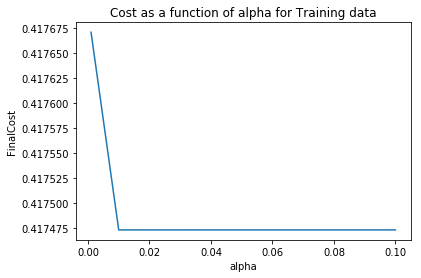

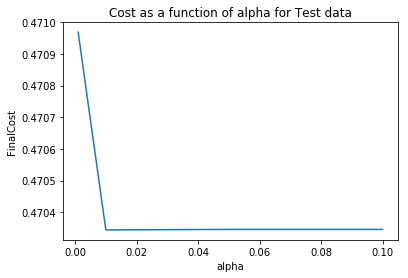

In [10]:
plt.plot(alpha,FinalCost_traindata)
plt.xlabel('alpha')
plt.ylabel('FinalCost')
plt.title('Cost as a function of alpha for Training data')
plt.show()

plt.plot(alpha,FinalCost_testdata)
plt.xlabel('alpha')
plt.ylabel('FinalCost')
plt.title('Cost as a function of alpha for Test data')
plt.show()


E:\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


[0.6792771491302145, 0.7093396385745651, 0.7010640094578618, 0.7147441310589427]


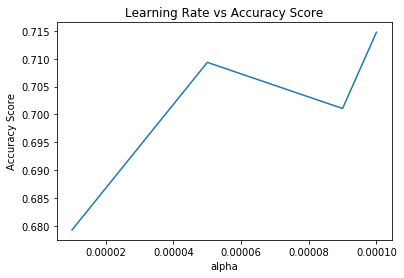

In [11]:
#Logistic regression

df1=pd.read_csv("E:\Assigment\energydata_complete.csv")
df1.drop(['date'],axis=1,inplace=True)
df1.rename(columns={'T1':'temp_kitchen','RH_1':'hum_kitchen','T2':'temp_living','RH_2':'hum_living','T3':'temp_laundry','RH_3':'hum_laundry','T4':'temp_office','RH_4':'hum_office','T5':'temp_bathroom','RH_5':'hum_bathroom','T6':'temp_northside','RH_6':'hum_northside','T7':'temp_ironing','RH_7':'hum_ironing','T8':'temp_teenager','RH_8':'hum_teenager','T9':'temp_parents','RH_9':'hum_parents','T_out':'temp_chievres','Press_mm_hg':'pressure_chievres','RH_out':'hum_chievres','Windspeed':'wind_chievres','Visibility':'visibility_chievres','Tdewpoint':'Tdewpoint_chievres','rv1':'random_variable1','rv2':'random_variable2'},inplace=True)
df1.drop(['random_variable1','random_variable2'],axis=1,inplace=True)
df1.drop(['temp_northside','temp_parents','lights','visibility_chievres'],axis=1,inplace=True)

df_Y1=df1.iloc[:,0:1].values
df_X1=df1
df_X1.drop(['Appliances'],axis=1,inplace=True)
df_Y1=np.where(df_Y1<=60,0,1)


from sklearn.preprocessing import StandardScaler
sc1=StandardScaler()
sc_df1 = pd.DataFrame(columns=df_X1.columns , index=df_X1.index)
sc_df1[sc_df1.columns] = sc1.fit_transform(df_X1)
sc_df1.head()

from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(sc_df1,df_Y1 , test_size=0.3)

from sklearn.linear_model import SGDClassifier 
from sklearn.metrics import accuracy_score
#LR_SGDC=SGDClassifier(alpha=0.0001,random_state=0)
#LR_SGDC.fit(X_train1, y_train1)  
#y_predicted=LR_SGDC.predict(X_test1)
#Acc_Rate=accuracy_score(y_test1,y_predicted)
#print(Acc_Rate)

Acc_Score=[]
alpha1=[0.00001,0.00005,0.00009,0.0001]
for i in alpha1:
    LR_SGDC=SGDClassifier(alpha=i,random_state=0)
    LR_SGDC.fit(X_train1, y_train1)
    y_predicted=LR_SGDC.predict(X_test1)
    Acc_Score.append(accuracy_score(y_test1,y_predicted))
    
print(Acc_Score)

plt.plot(alpha1,Acc_Score)
plt.xlabel('alpha')
plt.ylabel('Accuracy Score')
plt.title('Learning Rate vs Accuracy Score')
plt.show()

    


In [ ]:
#Experiment2
thres = [0.00001,0.00003,0.00007,0.00009]
Beta_Exp2 = np.zeros([1,22])
dictn_train = {}
dictn_iterations={}
FinalCost_testdataE2=[]
for i in thres:
    Beta_E2,dictn_train[i],dictn_iterations[i] = gradientDescent1(X_train,y_train,Beta_Exp2,100000,0.001, i)
    FinalCost_testdataE2.append(computeCost(X_test,y_test,Beta_E2))
print(dictn_train)
print(Beta_E2)
print(FinalCost_testdataE2)
print(dictn_iterations)
#print(dictn_test)

list_trainvalues=sorted(dictn_train.items())
xtrain,ytrain=zip(*list_trainvalues)
plt.plot(xtrain,ytrain)
plt.xlabel('Threshold')
plt.ylabel('Cost')
plt.title('Threshold vs Cost for training data')
plt.show()

list_trainvalues1=sorted(dictn_iterations.items())
xtrain1,ytrain1=zip(*list_trainvalues1)
plt.plot(ytrain1,ytrain)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Iterations vs Cost for training data')
plt.show()

plt.plot(thres,FinalCost_testdataE2)
plt.xlabel('Threshold')
plt.ylabel('Cost')
plt.title('Threshold vs Cost for test data')
plt.show()
    

In [ ]:
#Experiment3

import pandas as pd
df3=pd.read_csv("E:\Assigment\energydata_complete.csv")
df3.drop(['date'],axis=1,inplace=True)
df3.rename(columns={'T1':'temp_kitchen','RH_1':'hum_kitchen','T2':'temp_living','RH_2':'hum_living','T3':'temp_laundry','RH_3':'hum_laundry','T4':'temp_office','RH_4':'hum_office','T5':'temp_bathroom','RH_5':'hum_bathroom','T6':'temp_northside','RH_6':'hum_northside','T7':'temp_ironing','RH_7':'hum_ironing','T8':'temp_teenager','RH_8':'hum_teenager','T9':'temp_parents','RH_9':'hum_parents','T_out':'temp_chievres','Press_mm_hg':'pressure_chievres','RH_out':'hum_chievres','Windspeed':'wind_chievres','Visibility':'visibility_chievres','Tdewpoint':'Tdewpoint_chievres','rv1':'random_variable1','rv2':'random_variable2'},inplace=True)
df3.drop(['random_variable1','random_variable2'],axis=1,inplace=True)
df3.drop(['temp_northside','temp_parents','lights','visibility_chievres','hum_kitchen','temp_living','hum_laundry','temp_office','temp_bathroom','temp_ironing','hum_teenager','pressure_chievres','Tdewpoint_chievres','wind_chievres','hum_chievres'],axis=1,inplace=True)

from sklearn.preprocessing import StandardScaler
sc3=StandardScaler()
sc_df3 = pd.DataFrame(columns=df3.columns , index=df3.index)
sc_df3[sc_df3.columns] = sc3.fit_transform(df3)
sc_df3.head()

df_Y3=sc_df3.iloc[:,0:1].values
df_X3=sc_df3
df_X3.drop(['Appliances'],axis=1,inplace=True)

from sklearn.model_selection import train_test_split
X_train3, X_test3, y_train3, y_test3 = train_test_split(df_X3,df_Y3 , test_size=0.3,random_state=0)

ones = np.ones([X_train3.shape[0],1])
X_train3 = np.concatenate((ones,X_train3),axis=1)
ones = np.ones([X_test3.shape[0],1])
X_test3 = np.concatenate((ones,X_test3),axis=1)
Beta3 = np.zeros([1,11])
alpha3=[0.001,0.01,0.05,0.1]
iterations3=100000

FinalCost3_traindata=[]
FinalCost3_testdata=[]

for i in alpha3:
    b3,cost3=gradientDescent(X_train3,y_train3,Beta3,iterations3,i)
    FinalCost3_traindata.append(cost3[-1])
    FinalCost3_testdata.append(computeCost(X_test3,y_test3,b3))
    print('For Alpha= ',i,',beta values= ',b3)

print(FinalCost3_traindata)
print(FinalCost3_testdata)


E:\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
E:\Anaconda\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


For Alpha=  0.001 ,beta values=  [[-0.00511792 -0.22533343 -0.15827388  0.37596823  0.45888797  0.03279941
   0.09490054 -0.30149306 -0.03596169 -0.1808528   0.072771  ]]
For Alpha=  0.01 ,beta values=  [[-0.00511677 -0.22620349 -0.15869385  0.37670874  0.45946619  0.03279118
   0.09503415 -0.30152633 -0.03562105 -0.18105562  0.07265573]]
For Alpha=  0.05 ,beta values=  [[-0.00511677 -0.22620349 -0.15869385  0.37670874  0.45946619  0.03279118
   0.09503415 -0.30152633 -0.03562105 -0.18105562  0.07265573]]


In [ ]:
plt.plot(alpha3,FinalCost3_traindata)
plt.xlabel('alpha')
plt.ylabel('FinalCost')
plt.title('Learning Rate vs Cost for Training data')
plt.show()

plt.plot(alpha3,FinalCost3_testdata)
plt.xlabel('alpha')
plt.ylabel('FinalCost')
plt.title('Learning Rate vs Cost for Test data')
plt.show()

In [ ]:
#Experiment4

import pandas as pd
df4=pd.read_csv("E:\Assigment\energydata_complete.csv")
df4.drop(['date'],axis=1,inplace=True)
df4.rename(columns={'T1':'temp_kitchen','RH_1':'hum_kitchen','T2':'temp_living','RH_2':'hum_living','T3':'temp_laundry','RH_3':'hum_laundry','T4':'temp_office','RH_4':'hum_office','T5':'temp_bathroom','RH_5':'hum_bathroom','T6':'temp_northside','RH_6':'hum_northside','T7':'temp_ironing','RH_7':'hum_ironing','T8':'temp_teenager','RH_8':'hum_teenager','T9':'temp_parents','RH_9':'hum_parents','T_out':'temp_chievres','Press_mm_hg':'pressure_chievres','RH_out':'hum_chievres','Windspeed':'wind_chievres','Visibility':'visibility_chievres','Tdewpoint':'Tdewpoint_chievres','rv1':'random_variable1','rv2':'random_variable2'},inplace=True)
df4.drop(['random_variable1','random_variable2'],axis=1,inplace=True)
df4.drop(['temp_northside','temp_parents','lights','visibility_chievres','hum_kitchen','hum_living','temp_laundry','hum_laundry','temp_office','hum_office','temp_bathroom','hum_bathroom','hum_teenager','Tdewpoint_chievres','wind_chievres'],axis=1,inplace=True)
from sklearn.preprocessing import StandardScaler
sc4=StandardScaler()
sc_df4 = pd.DataFrame(columns=df4.columns , index=df4.index)
sc_df4[sc_df4.columns] = sc4.fit_transform(df4)
sc_df4.head()

df_Y4=sc_df4.iloc[:,0:1].values
df_X4=sc_df4
df_X4.drop(['Appliances'],axis=1,inplace=True)

from sklearn.model_selection import train_test_split
X_train4, X_test4, y_train4, y_test4 = train_test_split(df_X4,df_Y4 , test_size=0.3)

ones = np.ones([X_train4.shape[0],1])
X_train4 = np.concatenate((ones,X_train4),axis=1)
ones = np.ones([X_test4.shape[0],1])
X_test4 = np.concatenate((ones,X_test4),axis=1)
Beta4 = np.zeros([1,11])
alpha4=[0.001,0.01,0.05,0.1]
iterations4=100000

FinalCost4_traindata=[]
FinalCost4_testdata=[]

for i in alpha4:
    b4,cost4=gradientDescent(X_train4,y_train4,Beta4,iterations4,i)
    FinalCost4_traindata.append(cost4[-1])
    FinalCost4_testdata.append(computeCost(X_test4,y_test4,b4))
    print('For Alpha= ',i,',beta values= ',b4)

print(FinalCost4_traindata)
print(FinalCost4_testdata)


In [ ]:
plt.plot(alpha4,FinalCost4_traindata)
plt.xlabel('alpha')
plt.ylabel('FinalCost')
plt.title('Learning Rate vs Cost for Training data')
plt.show()

plt.plot(alpha4,FinalCost4_testdata)
plt.xlabel('alpha')
plt.ylabel('FinalCost')
plt.title('Learning Rate vs Cost for Test data')
plt.show()